# Cars4U

## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


## Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


## Data Information

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary**

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# set style makes the plot looks better
sns.set_style('darkgrid')

# This function changes the global defaults for all plots using the matplotlib rcParams system
sns.set()

# Sets the limit for the number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# EDA

In [3]:
# loading the dataset
df = pd.read_csv("/content/drive/My Drive/used_cars_data.csv")

# to view first 10 rows of the dataset
df.head(10)

# to view last 5 rows of the dataset
#df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [4]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

In [5]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [6]:
# checking for duplicate values in the data
print("The number of duplicate data: ", data.duplicated().sum())

The number of duplicate data:  0


In [7]:
# checking the names of the columns in the data
print("The names of the colums in the data:\n", data.columns.to_list())

# filtering numerical columns
print("\nThe numerical colums in the data:\n", data.select_dtypes(include=np.number).columns.to_list())

# filtering non-numerical columns
print("\nThe non-numerical colums in the data:\n", data.select_dtypes(exclude=np.number).columns.to_list())

The names of the colums in the data:
 ['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

The numerical colums in the data:
 ['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']

The non-numerical colums in the data:
 ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']


In [8]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


* Datatypes "int64" includes [S.No., Year, Kilometers_Driven]
* Datatypes "float64" includes [Seats, Price]
* Rest of columns are datatype are "object" 

Need to be changed later...
* Year: int64 to category (object)
* Mileage: object to int64
* Engine: object to int64
* Power: object to int64
* Seats: float64 to int64
* New_Price: object to float64

In [9]:
# Statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


"Kilometers_Driven" and " Price" may have outliers.
"Price" is right skewed since mean value is large greater than mean value.


In [10]:
# looking at which columns have the most missing values
data.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

In [11]:
# counting the number of missing values per row
data.isnull().sum(axis=1).value_counts()

1    5232
2    1125
0     823
4      36
3      27
5      10
dtype: int64

In [12]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns.to_list()
cat_columns

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price']

In [13]:
# printing the number of occurrences of each unique value in each categorical column
cat_col = cat_columns[1:5]


for column in cat_col:
    print(column, '\n')
    print(data[column].value_counts())
    print("-" * 50)

Location 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Fuel_Type 

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Transmission 

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
--------------------------------------------------
Owner_Type 

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
--------------------------------------------------


* Most of the cars are Mumbai, Diesel, Manual, First

# Data Preprocessing

- 'S.No.': Drop this column
- 'Name' : Split the string and take the first word as the name.
- 'Location': (No action is required)
- 'Year': (No action is required)
- 'Kilometers_Driven': (No action is required)
- 'Fuel_Type': (No action is required)
- 'Transmission' : (No action is required)
- 'Owner_Type': (No action is required)
- 'Mileage': Remove unit, fillna by mean value
- 'Engine': Remove unit, fillna by mean vlaue
- 'Power': Remove unit, fillna by mean vlaue
- 'Seats':, fillna by mean vlaue
- 'New_Price': Remove unit
- 'Price': fillna by mean vlaue

In [14]:
# checking the names of the columns in the data
print("The names of the colums in the data:\n", data.columns.to_list())

The names of the colums in the data:
 ['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


**S.No**

In [15]:
# Drop 'S.No.'
data.drop(["S.No."], axis=1, inplace=True)

**Name**

In [16]:
#Split the string and take the first word as the name.

def name_split(pos_val):
  """
  Split the string in the column "Name" and extract the first word
  """
  if isinstance(pos_val,str):
    return pos_val.split(' ')[0]
  else:
    return np.nan
data['Name'] = data['Name'].apply(name_split)

In [17]:
data.Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

**Year**

In [18]:
#data['Year'] = pd.to_datetime(data['Year'])
#data['Year'] = data['Year'].dt.year  # adding in a feature that's just the year

# Cut 'Year' to three bins and create a new column called "Buy_Time"
#data['Buy_Time'] = pd.cut(data.Year, bins=3, labels=['1', '2', '3'])
#print(data.Buy_Time.value_counts())
#data.head()

**Mileage**

In [19]:
# Remove unit and fillna by mean value
col = 'Mileage'
data[col] = data[col].apply(name_split)
data[col] = data[col].astype(float)
data[col].fillna(data[col].mean(), inplace=True)
print(f'Missing value of {col}: {data[col].isnull().sum()}')

Missing value of Mileage: 0


**Engine**

In [20]:
# Remove unit and fillna by mean value
col = 'Engine'
data[col] = data[col].apply(name_split)
data[col] = data[col].astype(float)
data[col].fillna(data[col].mean(), inplace=True)
print(f'Missing value of {col}: {data[col].isnull().sum()}')

Missing value of Engine: 0


**Power**

In [21]:
# Remove unit and fillna by mean value
col = 'Power'
data[col] = data[col].apply(name_split)
data[col] = data[col].astype(float)
data[col].fillna(data[col].mean(), inplace=True)
print(f'Missing value of {col}: {data[col].isnull().sum()}')

Missing value of Power: 0


**Seat**

In [22]:
# fillna by mean value
col = 'Seats'
data[col].fillna(data[col].mean(), inplace=True)
print(f'Missing value of {col}: {data[col].isnull().sum()}')

Missing value of Seats: 0


**New_Price**

In [23]:
# fillna by mean value
col = 'New_Price'
data[col] = data[col].apply(name_split)
data[col] = data[col].astype(float)
data[col].fillna(data[col].mean(), inplace=True)
print(f'Missing value of {col}: {data[col].isnull().sum()}')

Missing value of New_Price: 0


**Price**

In [24]:
col = 'Price'
data[col].fillna(data[col].mean(), inplace=True)
print(f'Missing value of {col}: {data[col].isnull().sum()}')

Missing value of Price: 0


**Review**

In [25]:
# Check number of missing value
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [26]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              7253 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000000,2014.000000,2016.000000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000000,53416.000000,73000.000000,6500000.00
Mileage,7253.0,18.141580,4.561567,0.00,15.170000,18.160000,21.100000,33.54
Engine,7253.0,1616.573470,593.394164,72.00,1198.000000,1493.000000,1968.000000,5998.00
Power,7253.0,112.765214,52.844178,34.20,77.000000,98.600000,138.030000,616.00
Seats,7253.0,5.279722,0.808688,0.00,5.000000,5.000000,5.000000,10.00
New_Price,7253.0,19.894324,7.376072,1.00,19.894324,19.894324,19.894324,99.92
Price,7253.0,9.479468,10.191695,0.44,3.850000,6.750000,9.479468,160.00


## Data Visualization

### Univariate Analysis

In [28]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

numerical columns:  ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


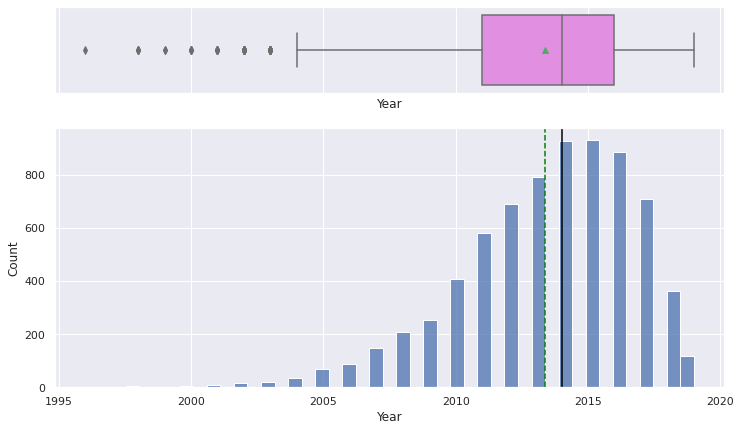

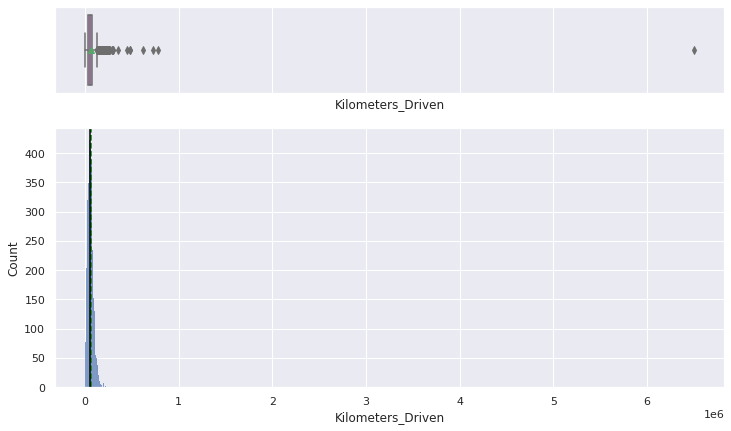

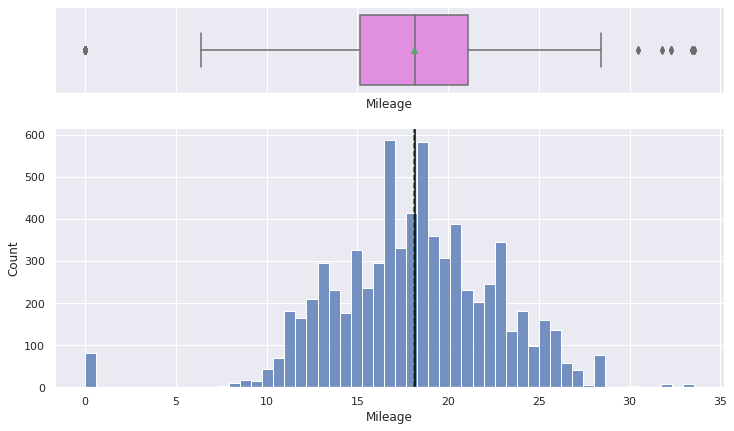

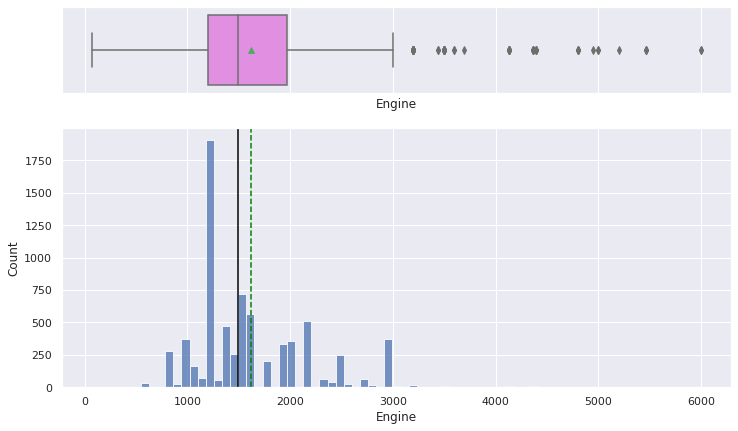

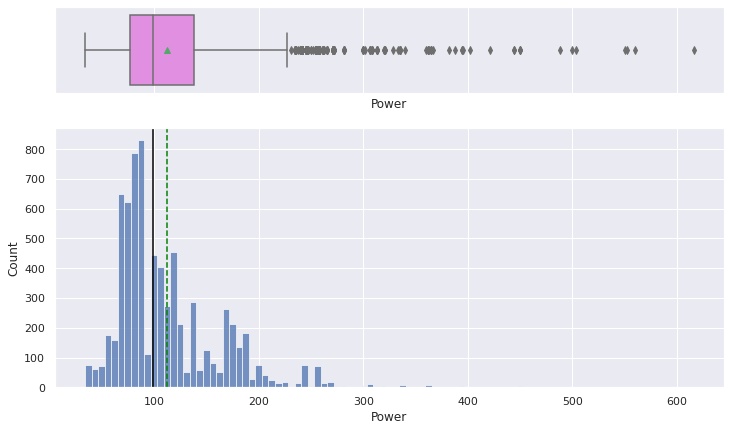

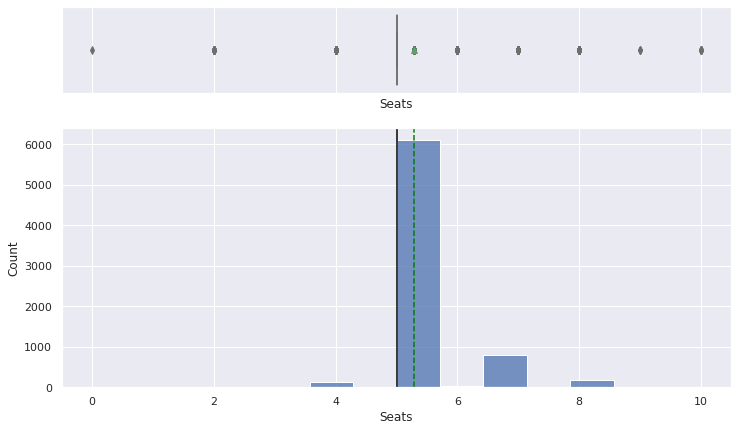

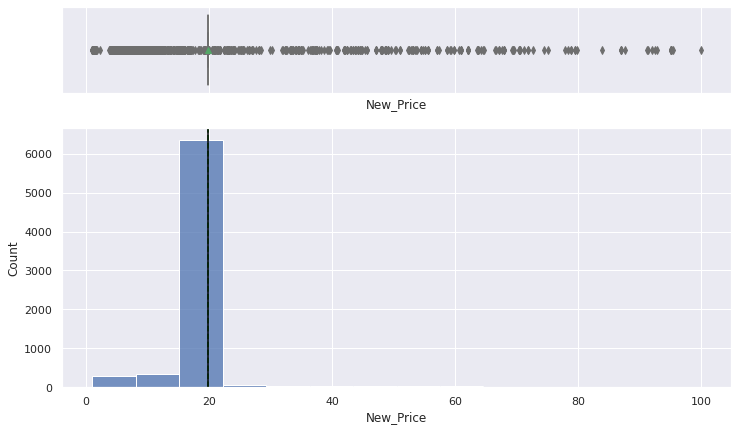

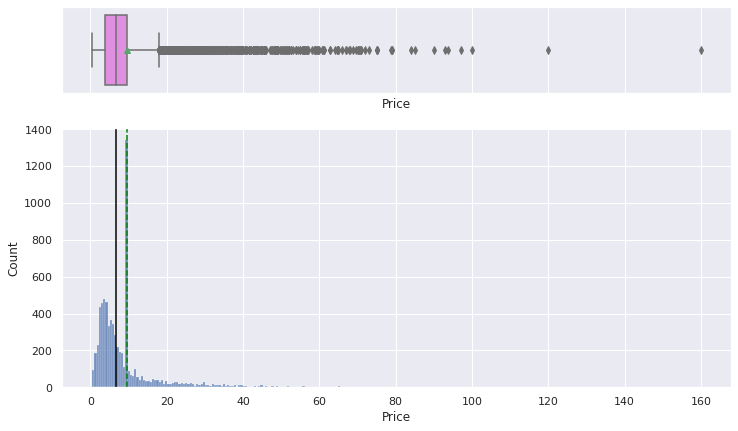

In [29]:
columns = data.select_dtypes(include=np.number).columns.to_list()
print("numerical columns: ", columns)
for col in columns:
  histogram_boxplot(data, col)

* The distribution of "Kilometers_Driven", "Power", "New_Price", "Price" are heavily right-skewed.

In [30]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

non-numerical columns:  ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


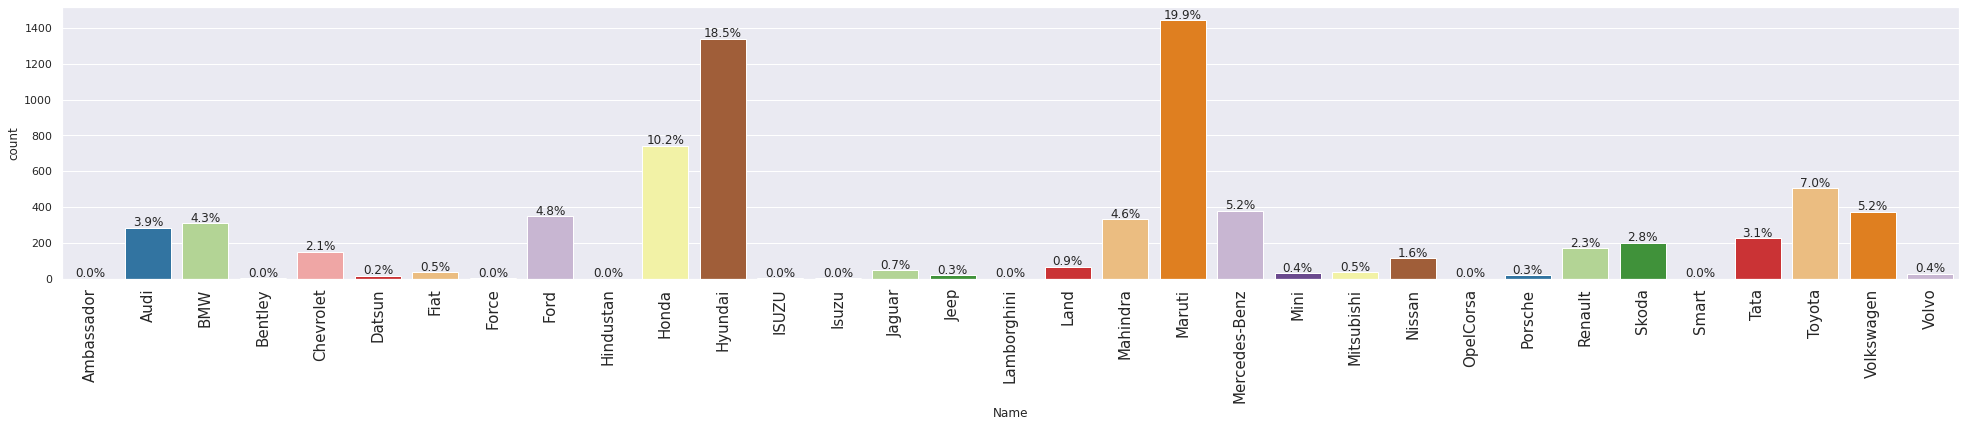

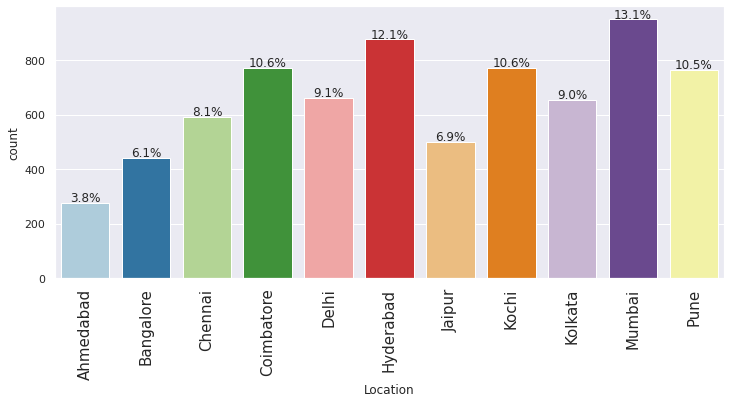

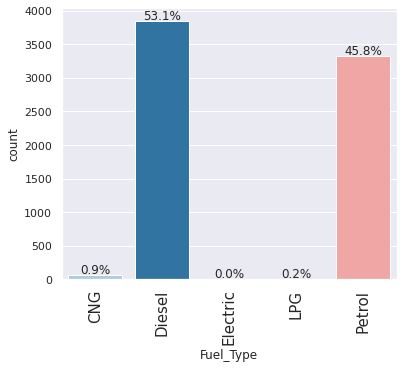

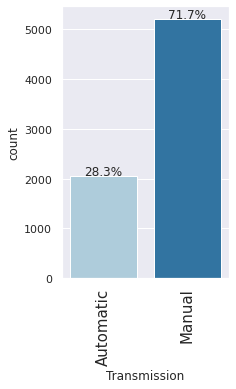

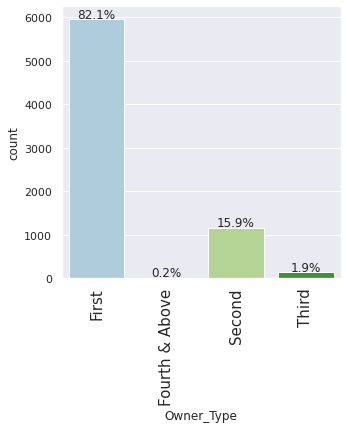

In [31]:
columns = data.select_dtypes(exclude=np.number).columns.to_list()
print("non-numerical columns: ", columns)
for col in columns:
  labeled_barplot(data, col,perc=True)

In [32]:
columns = data.select_dtypes(exclude=np.number).columns.to_list()
print("non-numerical columns: ", columns)
for col in columns:
    print(col, '\n')
    print(data[col].value_counts())
    print("-" * 50)

non-numerical columns:  ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
Name 

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Force               3
ISUZU               3
Isuzu               2
Bentley             2
Lamborghini         1
Smart               1
OpelCorsa           1
Hindustan           1
Ambassador          1
Name: Name, dtype: int64
--------------------------------------------------
Location 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
De

Top 1
-  Name: Maruti
-  Location: Mumbai
-  Fuel_Type: Diesel
-  Transmission: Manual
-  Owner_Type: First

### Bivariate analysis

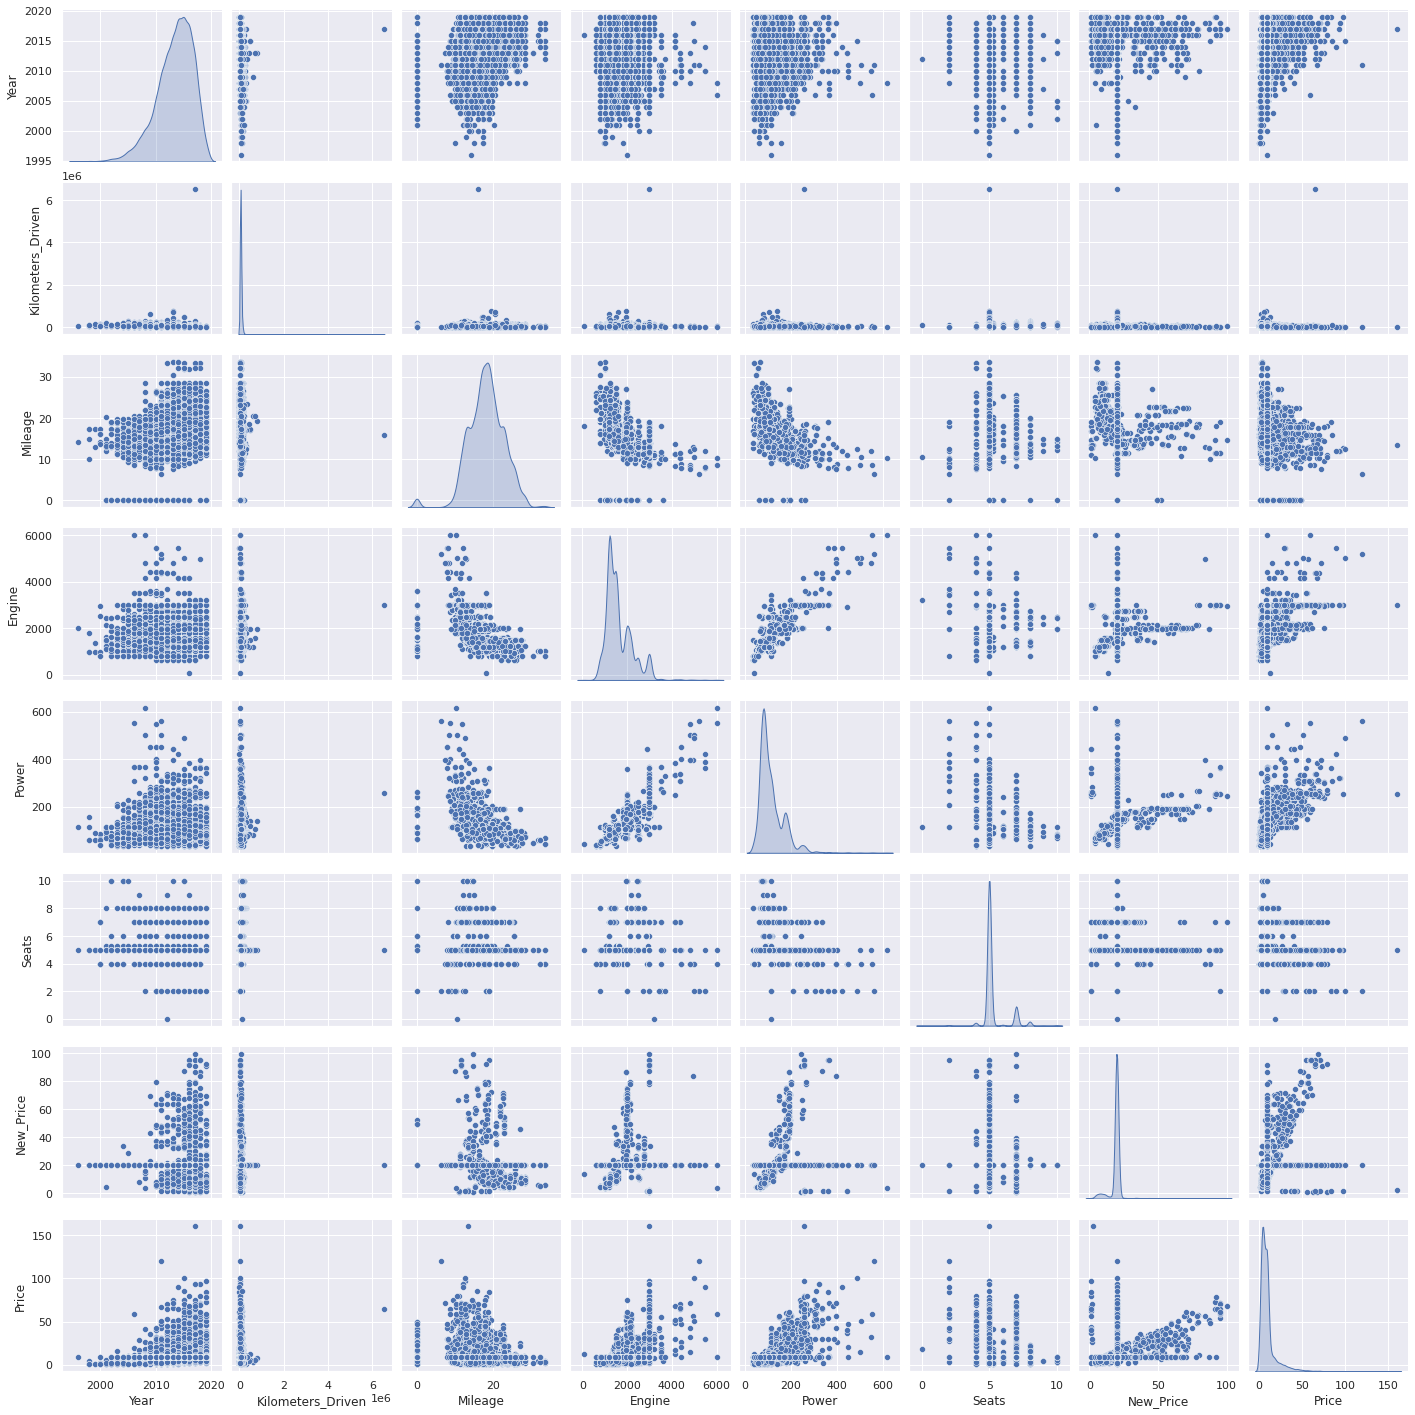

In [33]:
# Pair plot
sns.pairplot(data, diag_kind="kde");

**Numerical vs. Numerical**
1. Scatter plot
2. Line plot
3. Heatmap for correlation
4. Joint plot
5. Linear Regression plot

numerical columns:  ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


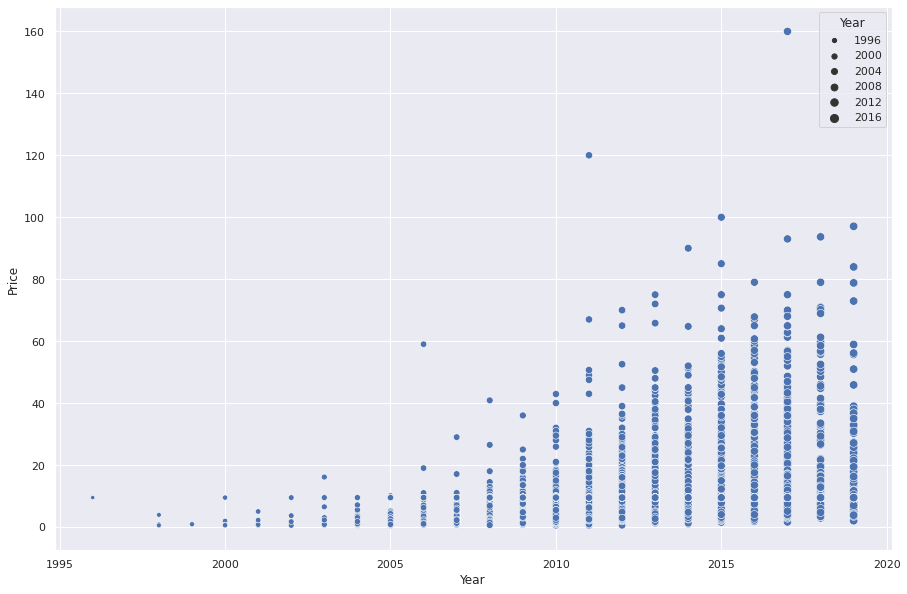

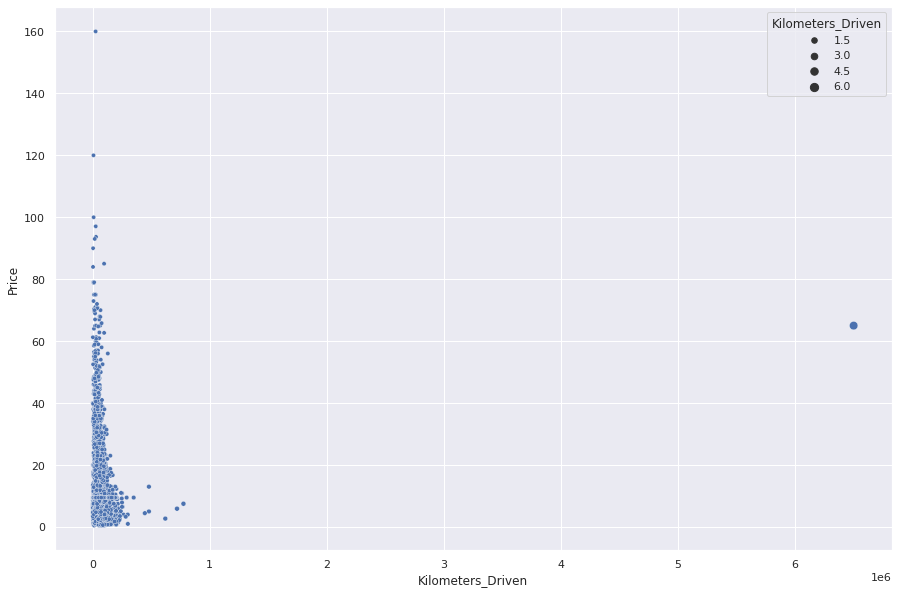

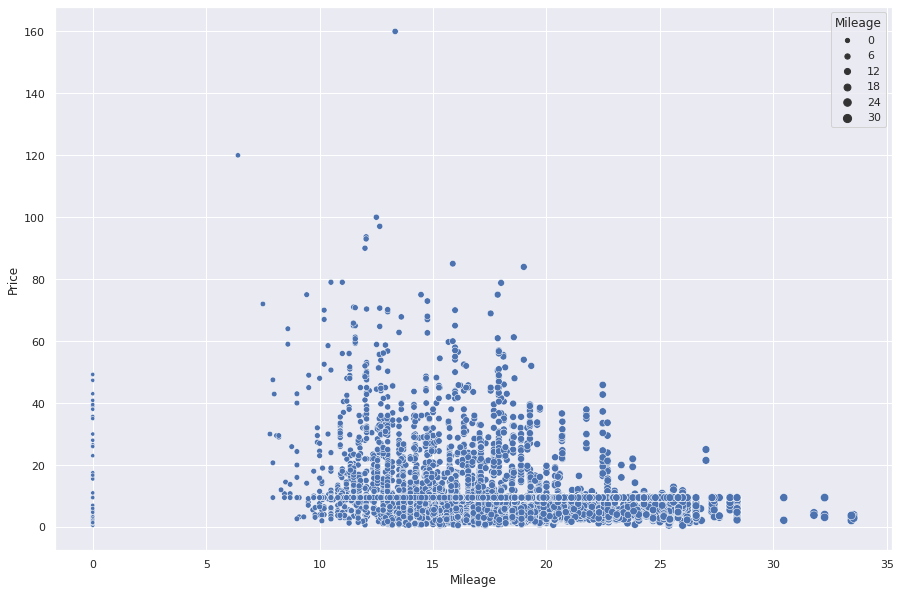

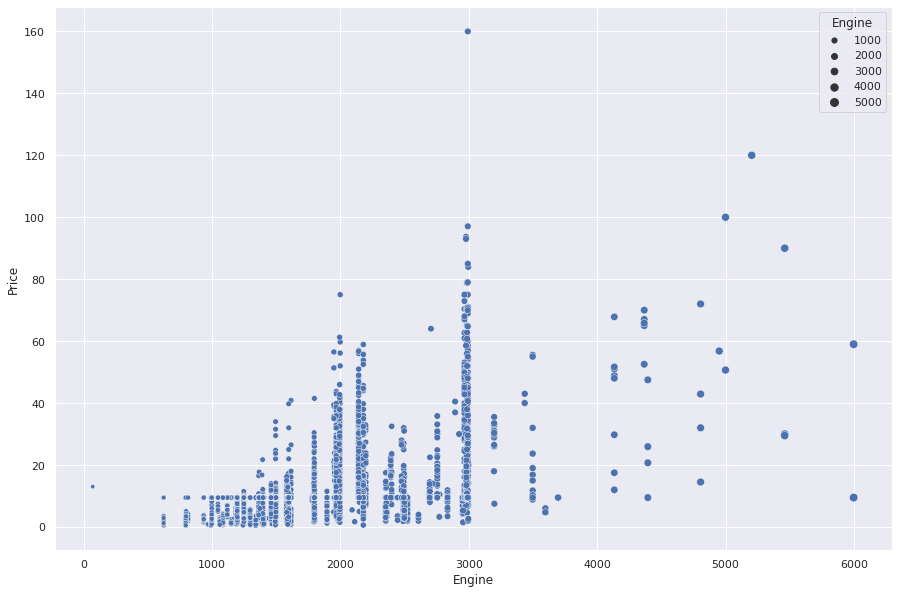

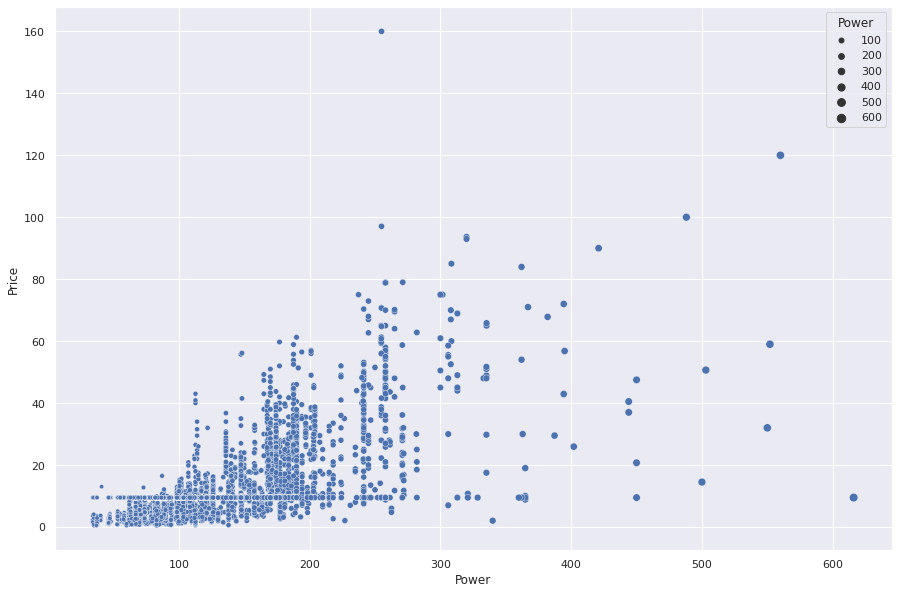

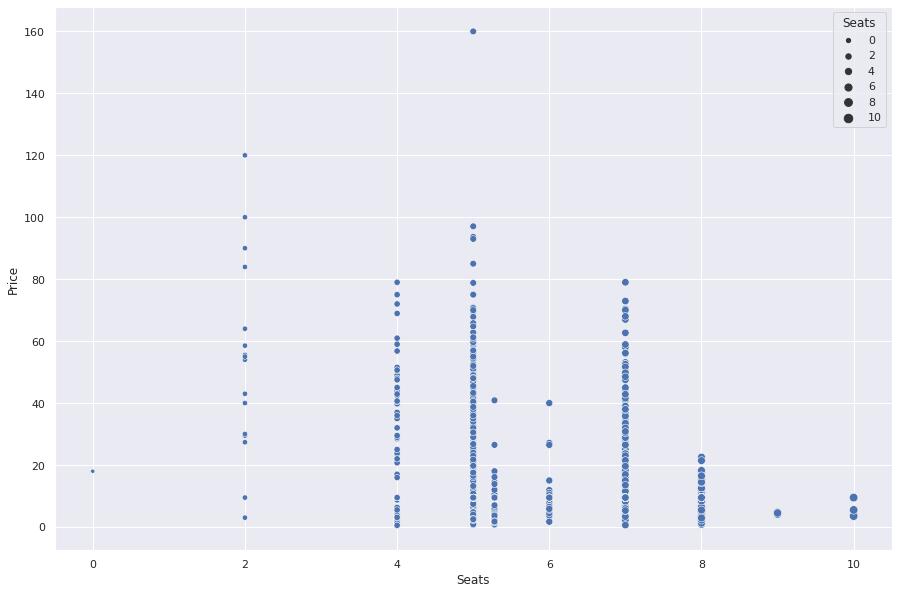

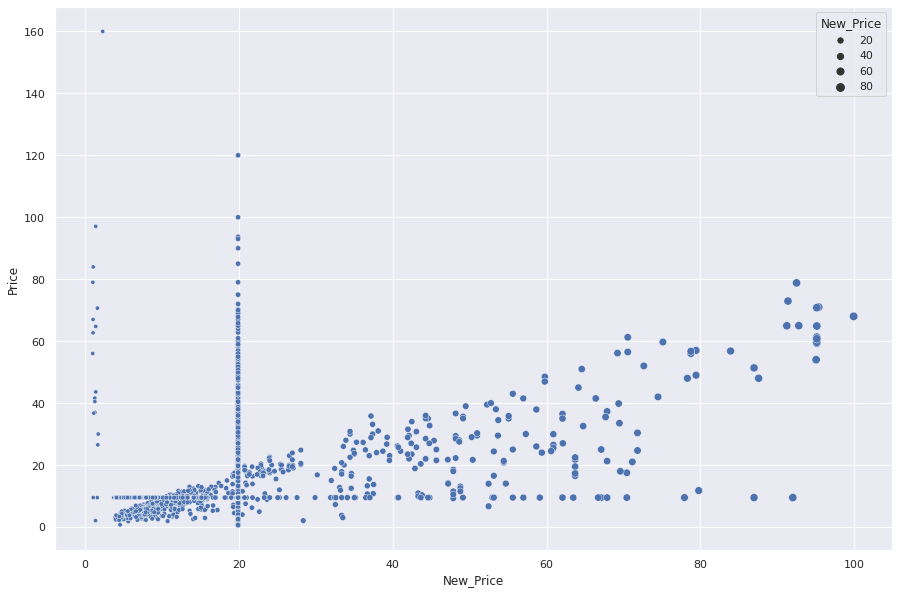

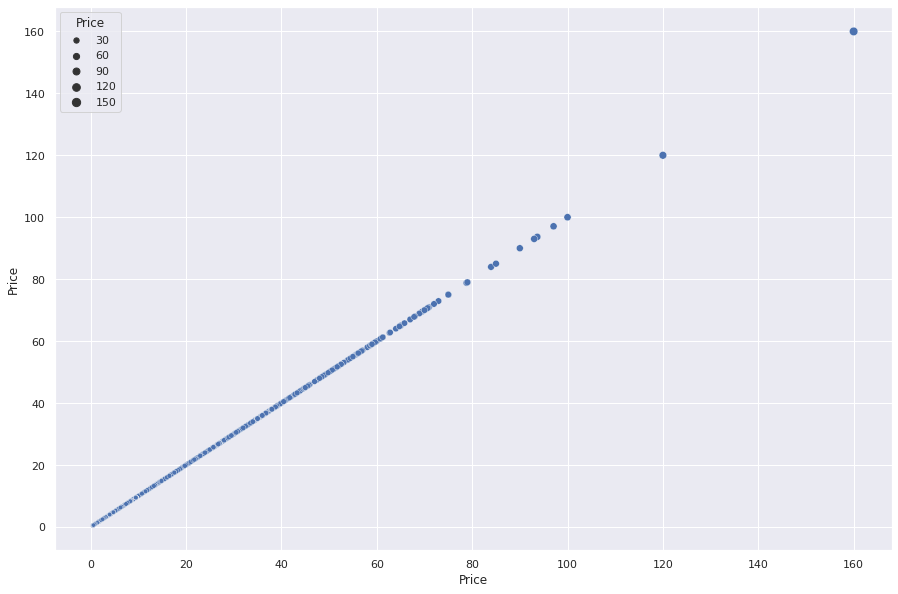

In [34]:
columns = data.select_dtypes(include=np.number).columns.to_list()
print("numerical columns: ", columns)
for col in columns:
  plt.figure(figsize=(15, 10))
  ## Scatter Plot
  sns.scatterplot(x=col,y='Price', data=data, size = col)
  ## Line plot
  #sns.lineplot(x=col,y='Price', data=data, size = col)
  ## Joint plot
  #sns.jointplot(x=col,y='Price', data=data,kind='hex')
  ## Linear Regression plot
  #sns.lmplot(x= col,y='Price', data=data);
  plt.show()

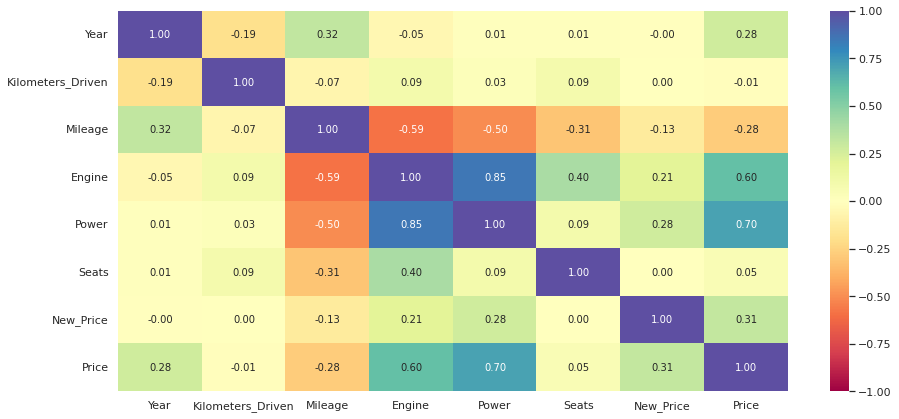

In [35]:
# Correlation Matrix
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* "Price" are highly correlated with "Engine" and "Power"
* "Power and "Engine" are highly correlated.

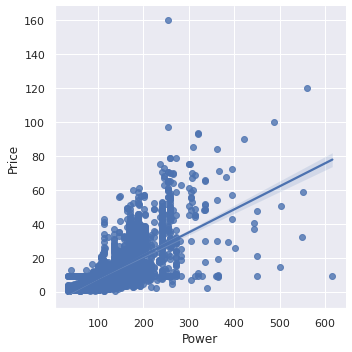

In [36]:
# Linear Regression plot
sns.lmplot(x= 'Power',y='Price', data=data);

**Numerical vs Categorical**
1. Bar chart
2. Violin plot
3. Box plot
4. Swarm plot
5. Strip Plot

non-numerical columns:  ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


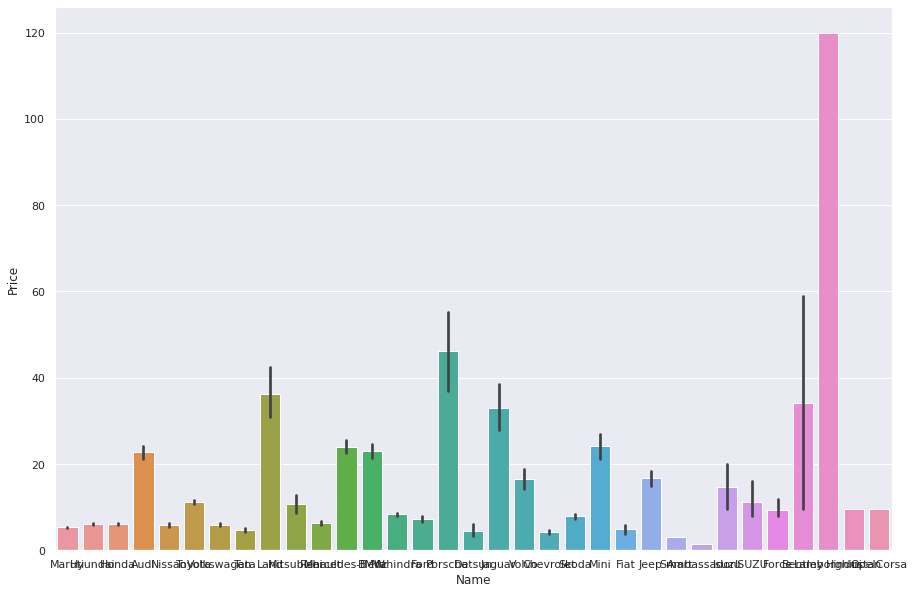

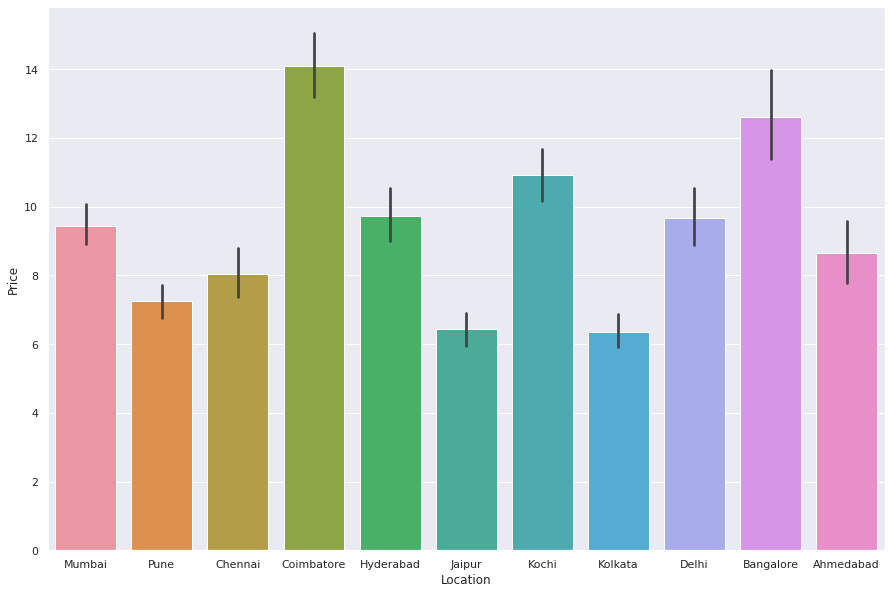

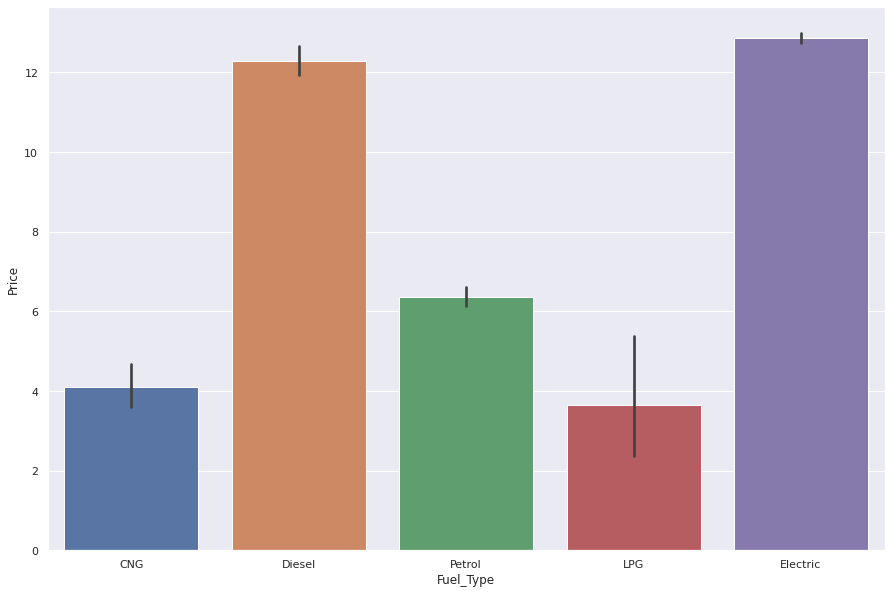

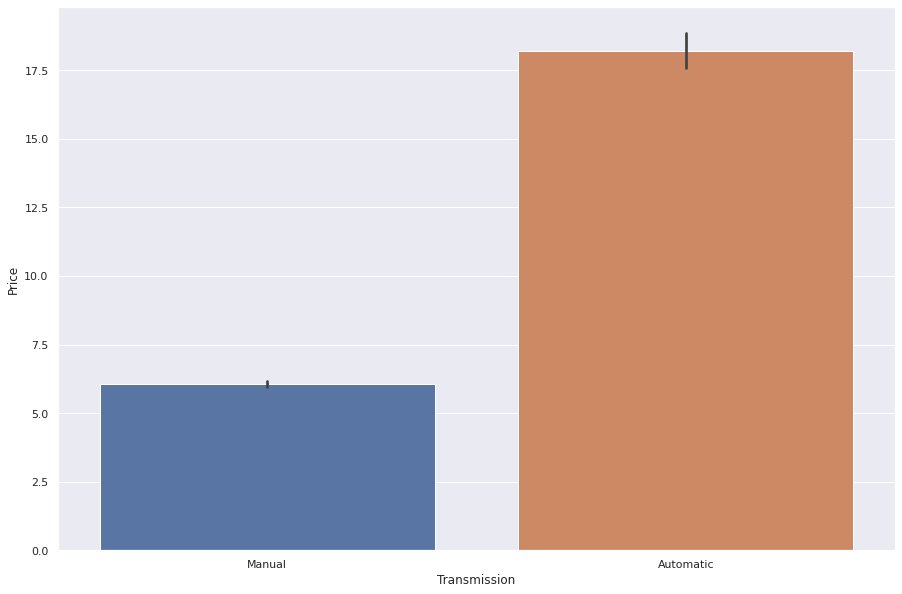

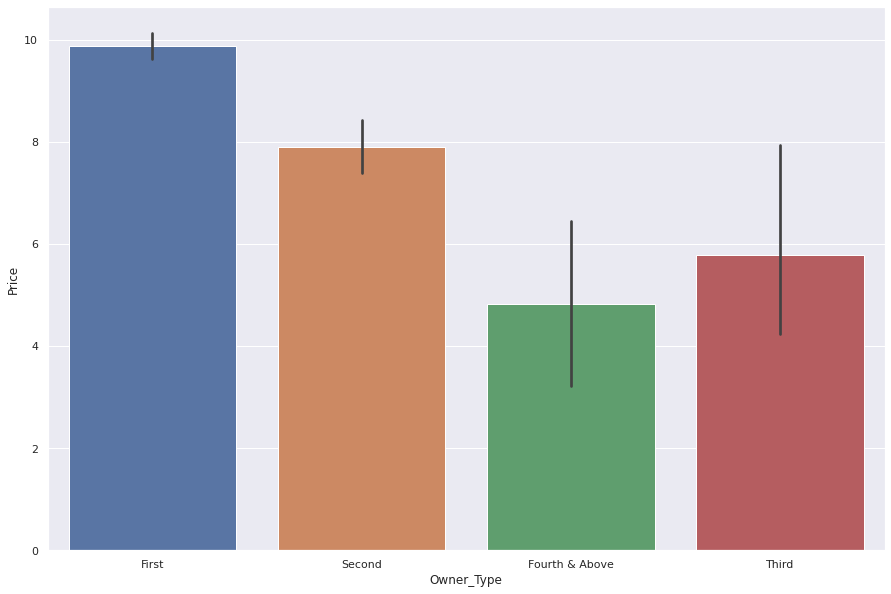

In [37]:
columns = data.select_dtypes(exclude=np.number).columns.to_list()
print("non-numerical columns: ", columns)
for col in columns:
  plt.figure(figsize=(15, 10))
  ## Bar Plot
  sns.barplot(x=col, y="Price", data=data)
  #sns.barplot(x=col, y="Price", data=data, order=data.sort_values('Price')[col])
  ## Violin Plot
  #sns.violinplot(x=col, y="Price", data=data, palette='muted',hue='Gender');
  #sns.boxplot(x=col, y="Price", data=data)
  ## Swarm Plot
  #sns.swarmplot(x=col, y="Price", data=data)
  ## Strip Plot
  #sns.stripplot(x=col, y="Price", data=data)
  plt.show()

## Pandas-Profiling Report##

In [38]:
## Installation pandas-profiling step 

# For local host
#import sys
#!{sys.executable} -m pip install pandas-profiling  --user

# For google colab
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 


# Please restart the kernel after installation

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [39]:
from pandas_profiling import ProfileReport

In [40]:
#profile = ProfileReport(data, title = 'Pandas Profiling Report',html={'style':{'full_width':True}})
#profile.to_widgets()

In [41]:
# Getting the pandas profiling report 
#profile.to_notebook_iframe()

# Save pandas profiling report as html
#profile.to_file("../content/drive/My Drive/output.html")

## Model Building

In [42]:
# Save clean data into CSV file
data.to_csv('used_cars_data_clean.csv',index= False)

In [43]:
# Read CSV file
data = pd.read_csv('used_cars_data_clean.csv')

In [44]:
# Drop "Engine" which is highly correlated to "Power"
data.drop("Engine", axis=1, inplace=True)
data.shape

(7253, 12)

In [45]:
# Define independent and dependent variables
X = data.drop(["Price"], axis=1)
y = data["Price"]

### Creating Dummy variables

In [46]:
#Creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Power,Seats,New_Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Hindustan,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_OpelCorsa,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,58.16,5.0,19.894324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,126.20,5.0,19.894324,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,88.70,5.0,8.610000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,88.76,7.0,19.894324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,140.80,5.0,19.894324,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [47]:
X.shape

(7253, 56)

In [48]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


In [49]:
# Fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Let us check the coefficients and intercept of the model, which are the parameters we learned.
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,7.850116e-01
Kilometers_Driven,-1.515904e-05
Mileage,-1.392357e-01
Power,7.631730e-02
Seats,4.370678e-01
New_Price,1.393930e-01
Name_Audi,1.631257e+00
Name_BMW,6.966486e-01
Name_Bentley,-1.050750e+01
Name_Chevrolet,-5.718897e+00


RMSE: 6.668332972196388


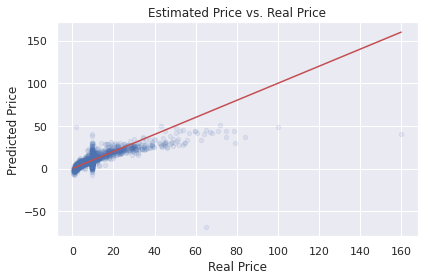

In [51]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import metrics

y_pred = lin_reg_model.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Visualizing Our predictions
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred, s=20,alpha=0.1)
plt.title('Estimated Price vs. Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

# Perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.tight_layout()

**Linear Regression with Polynomial Features**

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)


print(poly_clf.score(x_train2, y_train))

0.8361724067453391


In [53]:
print(poly_clf.score(x_test2, y_test))

-21.750142652778848


In [54]:
print(x_train.shape)
print(x_train2.shape)

(5077, 56)
(5077, 1597)


RMSE: 51.252216730505566


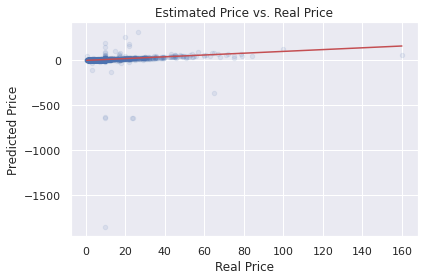

In [55]:
y_pred = poly_clf.predict(x_test2)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Visualizing Our predictions
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred, s=20,alpha=0.1)
plt.title('Estimated Price vs. Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

# Perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.tight_layout()

Linear Regression with Polynomial Features is not helpful in this case.
It has better R-square for training but worse for testing.

### Model performance check

In [56]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0] # number of rows
    k = predictors.shape[1] # number of columns(features)
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [57]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.726859,3.274772,0.668256,0.664556,47.135108


In [58]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.668333,3.299994,0.614882,0.604705,47.806565


**Observations**

- R-square for training and testing are 0.67 and 0.61, which are not comaparble.

- RMSE for training and testing are 5.7 and 6.6, which are not comaparble.

## Forward Feature Selection using

In [59]:
# please uncomment and run the next line if mlxtend library is not previously installed
!pip install mlxtend

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2, 
    cv=5        # cross-validation
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    2.0s finished

[2021-11-14 18:20:46] Features: 1/56 -- score: 0.4755436458004619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.5s finished

[2021-11-14 18:20:47] Features: 2/56 -- score: 0.5542611000933657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent wor

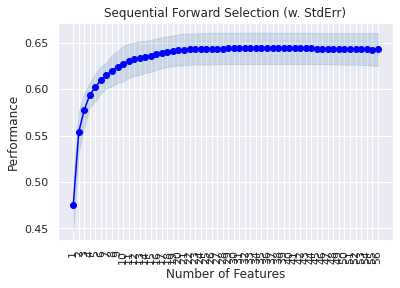

In [61]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err")
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* The performance increases untill the 20th feature and then slowly becomes constant.


In [62]:
reg = LinearRegression()

# Build step forward feature selection (select 20 features only)
sfs = SFS(
    reg,
    k_features=20,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.5s finished

[2021-11-14 18:21:28] Features: 1/20 -- score: 0.4755436458004619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.6s finished

[2021-11-14 18:21:29] Features: 2/20 -- score: 0.5542611000933657[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.6s finished

[2021-11-14 18:21:30] Features: 3/20 -- score: 0.5778013207225446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.6s finished

[2021-11-14 18:21:30] Features: 4/20 -- score: 0.594063943832271[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.6s finished

[

In [63]:
# Select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 5, 6, 7, 19, 21, 22, 24, 25, 26, 30, 35, 40, 41, 45, 46, 48]


In [64]:
# The names of the important features
x_train.columns[feat_cols].to_list()

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Power',
 'New_Price',
 'Name_Audi',
 'Name_BMW',
 'Name_Jaguar',
 'Name_Lamborghini',
 'Name_Land',
 'Name_Maruti',
 'Name_Mercedes-Benz',
 'Name_Mini',
 'Name_Porsche',
 'Name_Toyota',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Fuel_Type_Diesel']

**Now we will fit an sklearn model using these features only.**

In [65]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_train_final = x_train[x_train.columns[feat_cols]]
x_test_final = x_test[x_train_final.columns]

In [66]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.767650
Kilometers_Driven,-0.000015
Mileage,-0.150508
Power,0.075164
New_Price,0.141658
Name_Audi,7.549473
Name_BMW,6.485168
Name_Jaguar,11.019799
Name_Lamborghini,79.653730
Name_Land,18.973044


In [67]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.763799,3.310394,0.663963,0.662634,47.181521


In [68]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.689205,3.309108,0.612468,0.608871,47.284083


- The performance looks slightly worse than the previous model.
- Let's compare the two models we built.

In [69]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,5.726859,5.763799
MAE,3.274772,3.310394
R-squared,0.668256,0.663963
Adj. R-squared,0.664556,0.662634
MAPE,47.135108,47.181521


In [70]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,6.668333,6.689205
MAE,3.299994,3.309108
R-squared,0.614882,0.612468
Adj. R-squared,0.604705,0.608871
MAPE,47.806565,47.284083


In [71]:
print(x_train.shape)
print(x_train_final.shape)

(5077, 56)
(5077, 20)


* The new model has less features but has comapraible R-square value

## Conclusions

- According the correlation matrix, we found that "Price" are highly correlated with "Engine" and "Power" and also "Power and "Engine" are highly correlated.
- By linear regression model, the R-square for testing is 0.61
- The RMSE mean is 0.69.
- By forwared feature selection, we can reduce the number of features less than half and still keep the comparible R-square value.